In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned_Dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
encoder = LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0], str):
        df[i] = encoder.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


In [4]:
X = df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Outlet_Establishment_Year','Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
X.head()

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,4,249.8092,9,1,0,1
1,14,48.2692,3,1,2,2
2,10,141.6180,9,1,0,1
3,6,182.0950,0,1,2,0
4,9,53.8614,1,0,2,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [6]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
Yhat_train = mlr.predict(X_train)
Yhat_test = mlr.predict(X_test)
print("Intercept:",mlr.intercept_,"||Coefficient:",mlr.coef_)
print('Predicted values (Train)->',Yhat_train[0:4])
print('Predicted values-> (Test)',Yhat_test[0:4])
print('R-Squared (Train)->',np.round(mlr.score(X_train,y_train), decimals=3)*100,'% of variation of the Sales is explained by multiple linear model independent variables')
print('R-Squared (Test)->',np.round(mlr.score(X_test,y_test), decimals=2)*100,'% of variation of the Sales is explained by multiple linear model independent variables')
MSE_train = mean_squared_error(y_train,Yhat_train)
MSE_test = mean_squared_error(y_test, Yhat_test)
print('Mean Squared Error (Train)->',MSE_train,'\n')
print('Mean Squared Error (Test)->', MSE_test,'\n')

Intercept: -607.7655655912231 ||Coefficient: [   1.20922615   14.83288552   69.20679263 -363.83141033 -203.47576353
  820.14527381]
Predicted values (Train)-> [1472.76173802 1968.8290855  3823.8136455  1287.79949574]
Predicted values-> (Test) [2505.9350387  2401.11881472 1716.43043086 1912.34659475]
R-Squared (Train)-> 52.0 % of variation of the Sales is explained by multiple linear model independent variables
R-Squared (Test)-> 51.0 % of variation of the Sales is explained by multiple linear model independent variables
Mean Squared Error (Train)-> 1242829.4666455672 

Mean Squared Error (Test)-> 1352385.2615974988 



<h4>After applying Transformation on Item_Outlet_Sales

In [7]:
df['Item_Outlet_Sales'] = np.sqrt(df['Item_Outlet_Sales'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,61.115775
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,21.057607
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,45.795961
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,27.062520
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,31.538947


In [8]:
X = df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Outlet_Establishment_Year','Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
X.head()

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,4,249.8092,9,1,0,1
1,14,48.2692,3,1,2,2
2,10,141.6180,9,1,0,1
3,6,182.0950,0,1,2,0
4,9,53.8614,1,0,2,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [10]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
Yhat_train = mlr.predict(X_train)
Yhat_test = mlr.predict(X_test)
print("Intercept:",mlr.intercept_,"||Coefficient:",mlr.coef_)
print('Predicted values (Train)->',Yhat_train[0:4])
print('Predicted values-> (Test)',Yhat_test[0:4])
print('R-Squared (Train)->',np.round(mlr.score(X_train,y_train), decimals=3)*100,'% of variation of the Sales is explained by multiple linear model independent variables')
print('R-Squared (Test)->',np.round(mlr.score(X_test,y_test), decimals=2)*100,'% of variation of the Sales is explained by multiple linear model independent variables')
MSE_train = mean_squared_error(y_train,Yhat_train)
MSE_test = mean_squared_error(y_test, Yhat_test)
print('Mean Squared Error (Train)->',MSE_train,'\n')
print('Mean Squared Error (Test)->', MSE_test,'\n')

Intercept: 12.185117299364194 ||Coefficient: [ 3.77834299e-03  1.61319613e-01  1.11373192e+00 -5.50282284e+00
 -2.65829555e+00  9.97837286e+00]
Predicted values (Train)-> [35.54600686 39.94096806 62.84238988 31.11591078]
Predicted values-> (Test) [47.56894398 47.33194235 37.17718284 39.33604831]
R-Squared (Train)-> 56.699999999999996 % of variation of the Sales is explained by multiple linear model independent variables
R-Squared (Test)-> 55.00000000000001 % of variation of the Sales is explained by multiple linear model independent variables
Mean Squared Error (Train)-> 138.2338757092569 

Mean Squared Error (Test)-> 150.44602480346404 



[]

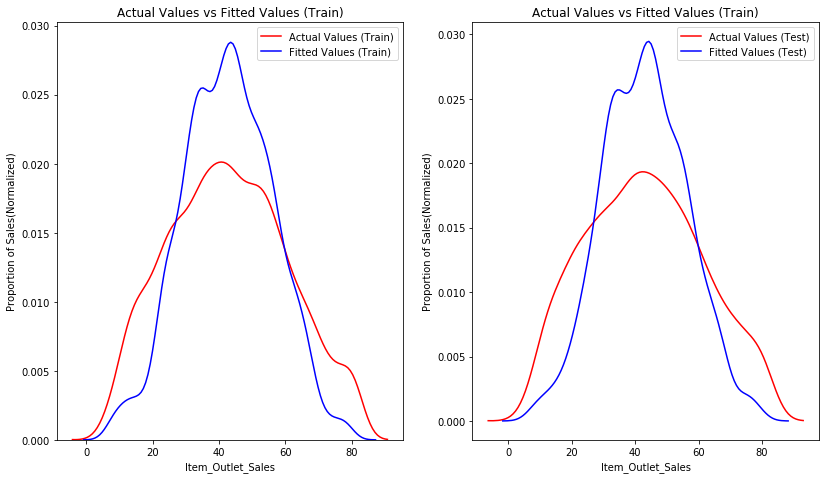

In [11]:
# Distribution Plot for Training Data
fig = plt.figure(figsize=[13.66,7.68])
plt.subplot(1,2,1)
sns.distplot(y_train, hist=False, color='red', label='Actual Values (Train)')
sns.distplot(Yhat_train, hist=False, color='blue', label='Fitted Values (Train)')
plt.title('Actual Values vs Fitted Values (Train)')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')

# Distribution Plot for Testing Data
plt.subplot(1,2,2)
sns.distplot(y_test, hist=False, color='red', label='Actual Values (Test)')
sns.distplot(Yhat_test, hist=False, color='blue', label='Fitted Values (Test)')
plt.title('Actual Values vs Fitted Values (Train)')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h2>Ridge/ L2 Regularization

In [12]:
rm = Ridge(alpha=1, random_state=0)
rm.fit(X_train,y_train)
Yhat_train = rm.predict(X_train)
Yhat_test = rm.predict(X_test)
print("Intercept:",mlr.intercept_,"||Coefficient:",mlr.coef_)
print('Predicted values (Train)->',Yhat_train[0:4])
print('Predicted values-> (Test)',Yhat_test[0:4])
print('R-Squared (Train)->',np.round(rm.score(X_train,y_train), decimals=3)*100,'% of variation of the Sales is explained by ridge model independent variables')
print('R-Squared (Test)->',np.round(rm.score(X_test,y_test), decimals=2)*100,'% of variation of the Sales is explained by ridge model independent variables')
MSE_train = mean_squared_error(y_train,Yhat_train)
MSE_test = mean_squared_error(y_test, Yhat_test)
print('Mean Squared Error (Train)->',MSE_train,'\n')
print('Mean Squared Error (Test)->', MSE_test,'\n')

Intercept: 12.185117299364194 ||Coefficient: [ 3.77834299e-03  1.61319613e-01  1.11373192e+00 -5.50282284e+00
 -2.65829555e+00  9.97837286e+00]
Predicted values (Train)-> [35.54557698 39.9341685  62.83775877 31.11513119]
Predicted values-> (Test) [47.57354221 47.3273308  37.17038693 39.32924936]
R-Squared (Train)-> 56.699999999999996 % of variation of the Sales is explained by ridge model independent variables
R-Squared (Test)-> 55.00000000000001 % of variation of the Sales is explained by ridge model independent variables
Mean Squared Error (Train)-> 138.23390081909344 

Mean Squared Error (Test)-> 150.44775743733322 



<h2>Grid Search</h2>
The term Alfa is a hyperparameter.We will use Grid Search process of finding the best hyperparameter simpler.

In [13]:
parameters= [{'alpha': [0.001, 0.1, 1, 2, 3, 4, 5, 10, 100, 1000, 10000, 100000, 100000],'normalize':[True,False]}]
parameters

[{'alpha': [0.001, 0.1, 1, 2, 3, 4, 5, 10, 100, 1000, 10000, 100000, 100000],
  'normalize': [True, False]}]

In [14]:
RR = Ridge()
Grid = GridSearchCV(RR, parameters, cv=4, return_train_score=True)
Grid.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 2, 3, 4, 5, 10, 100, 1000,
                                    10000, 100000, 100000],
                          'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [15]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [16]:
scores = Grid.cv_results_
Scores_frame = pd.DataFrame(scores)
Scores_frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.045507,0.068748,0.003098,0.000903,0.001,True,"{'alpha': 0.001, 'normalize': True}",0.532110,0.567679,0.586026,0.575660,0.565364,0.020275,1,0.577918,0.566688,0.560109,0.563925,0.567160,6.635966e-03
1,0.006322,0.001935,0.002997,0.000703,0.001,False,"{'alpha': 0.001, 'normalize': False}",0.532039,0.567721,0.586013,0.575690,0.565361,0.020306,6,0.577919,0.566689,0.560110,0.563926,0.567161,6.635928e-03
2,0.008106,0.000845,0.004295,0.001050,0.1,True,"{'alpha': 0.1, 'normalize': True}",0.533059,0.559786,0.579210,0.568130,0.560041,0.017037,11,0.572348,0.561302,0.554234,0.558384,0.561567,6.712098e-03
3,0.005827,0.000871,0.003213,0.001129,0.1,False,"{'alpha': 0.1, 'normalize': False}",0.532040,0.567720,0.586016,0.575689,0.565361,0.020306,5,0.577919,0.566689,0.560110,0.563926,0.567161,6.635928e-03
4,0.005733,0.000846,0.002265,0.000444,1,True,"{'alpha': 1, 'normalize': True}",0.420118,0.421768,0.431732,0.426346,0.424990,0.004511,14,0.434362,0.426329,0.419752,0.422769,0.425803,5.462515e-03
5,0.003982,0.001226,0.001635,0.000420,1,False,"{'alpha': 1, 'normalize': False}",0.532045,0.567703,0.586041,0.575676,0.565361,0.020308,3,0.577919,0.566689,0.560110,0.563925,0.567161,6.635933e-03
6,0.005486,0.001120,0.002636,0.000975,2,True,"{'alpha': 2, 'normalize': True}",0.316626,0.314053,0.320111,0.316576,0.316841,0.002155,17,0.323858,0.318031,0.313100,0.314883,0.317468,4.089658e-03
7,0.004135,0.001135,0.003251,0.000428,2,False,"{'alpha': 2, 'normalize': False}",0.532050,0.567685,0.586068,0.575662,0.565361,0.020311,2,0.577919,0.566688,0.560110,0.563925,0.567160,6.635948e-03
8,0.005328,0.001814,0.002388,0.000412,3,True,"{'alpha': 3, 'normalize': True}",0.251594,0.248256,0.252569,0.249807,0.250556,0.001657,18,0.256124,0.251612,0.247758,0.248915,0.251102,3.218931e-03
9,0.003535,0.000455,0.003648,0.001059,3,False,"{'alpha': 3, 'normalize': False}",0.532055,0.567666,0.586095,0.575648,0.565361,0.020313,4,0.577918,0.566688,0.560109,0.563924,0.567160,6.635973e-03


In [17]:
print('Training Score:',np.round(BestRR.score(X_train,y_train), decimals=3)*100,'%')
print('Testing Score:',np.round(BestRR.score(X_test,y_test), decimals=3)*100,'%')

Training Score: 56.699999999999996 %
Testing Score: 55.400000000000006 %


<h2>Lasso/ L1 Regularization

In [18]:
lasso = Lasso(alpha=0.01, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=0, selection='cyclic')
lasso.fit(X_train,y_train)
print("Intercept:",lasso.intercept_,"||Coefficient:",mlr.coef_)
print('Predicted values (Train)->',Yhat_train[0:4])
print('Predicted values-> (Test)',Yhat_test[0:4])
print('R-Squared (Train)->',np.round(lasso.score(X_train,y_train), decimals=4)*100,'% of variation of the Sales is explained by multiple linear model independent variables')
print('R-Squared (Test)->',np.round(lasso.score(X_test,y_test), decimals=3)*100,'% of variation of the Sales is explained by multiple linear model independent variables')
MSE_train = mean_squared_error(y_train,Yhat_train)
MSE_test = mean_squared_error(y_test, Yhat_test)
print('Mean Squared Error (Train)->',MSE_train,'\n')
print('Mean Squared Error (Test)->', MSE_test,'\n')

Intercept: 11.943795651770486 ||Coefficient: [ 3.77834299e-03  1.61319613e-01  1.11373192e+00 -5.50282284e+00
 -2.65829555e+00  9.97837286e+00]
Predicted values (Train)-> [35.54557698 39.9341685  62.83775877 31.11513119]
Predicted values-> (Test) [47.57354221 47.3273308  37.17038693 39.32924936]
R-Squared (Train)-> 56.71000000000001 % of variation of the Sales is explained by multiple linear model independent variables
R-Squared (Test)-> 55.400000000000006 % of variation of the Sales is explained by multiple linear model independent variables
Mean Squared Error (Train)-> 138.23390081909344 

Mean Squared Error (Test)-> 150.44775743733322 



The results are not so different from Multiple Linear Regression even after searching for the best hyperparameter.